In [18]:
import numpy as np
import pandas as pd
import glob
import os
import scipy.io
%load_ext autoreload
import process_functions as pf
import matplotlib.pyplot as plt
import scipy


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load in data
* EEG dataset from 61 ADHD + 60 control participants
* aged 7-12 yo
* Nasarabadi et al, https://ieee-dataport.org/open-access/eeg-data-adhd-control-children

In [2]:
path = '/Users/dominicburrows/Dropbox/PhD/Analysis/Project/deep_EEGauditory/'
meta = pd.read_csv(path + 'channel_labels.csv')
! ls $path


ADHD                Channel_Labels.docx Control             channel_labels.csv


In [3]:
adhd_l = glob.glob(path+'ADHD/**')
cnt_l = glob.glob(path+'Control/**')
len(adhd_l), len(cnt_l)

(61, 60)

In [56]:
#Define key parameters
fs = 128 #sampling rate Hz

# Pre-process data



In [8]:
meta

,Channel Number,labels
0,1,Fp1
1,2,Fp2
2,3,F3
3,4,F4
4,5,C3
5,6,C4
6,7,P3
7,8,P4
8,9,O1
9,10,O2


In [66]:
for curr in adhd_l:
    dic = pf.mat_load(curr)
    print(dic['data'].shape)
    print(f"""Time in seconds: {int(dic['data'].shape[0]/fs)}""")



(17401, 19)
Time in seconds: 135
(16697, 19)
Time in seconds: 130
(21372, 19)
Time in seconds: 166
(35328, 19)
Time in seconds: 276
(12739, 19)
Time in seconds: 99
(20097, 19)
Time in seconds: 157
(12353, 19)
Time in seconds: 96
(20173, 19)
Time in seconds: 157
(20456, 19)
Time in seconds: 159
(9852, 19)
Time in seconds: 76
(16574, 19)
Time in seconds: 129
(17561, 19)
Time in seconds: 137
(24241, 19)
Time in seconds: 189
(19621, 19)
Time in seconds: 153
(9286, 19)
Time in seconds: 72
(18657, 19)
Time in seconds: 145
(20115, 19)
Time in seconds: 157
(14304, 19)
Time in seconds: 111
(21663, 19)
Time in seconds: 169
(12258, 19)
Time in seconds: 95
(17323, 19)
Time in seconds: 135
(23681, 19)
Time in seconds: 185
(28880, 19)
Time in seconds: 225
(18389, 19)
Time in seconds: 143
(11679, 19)
Time in seconds: 91
(17604, 19)
Time in seconds: 137
(27612, 19)
Time in seconds: 215
(10477, 19)
Time in seconds: 81
(16385, 19)
Time in seconds: 128
(33570, 19)
Time in seconds: 262
(18049, 19)
Time in

In [120]:
## Filter frequencies > 50Hz
#===================================
#Filtering parameters
lp_cutoff = 60
f0 = 50
Q = 100
fs = fs

curr = adhd_l[0]
dic = pf.mat_load(curr)

In [ ]:
import numpy as np

# Assuming `signals` is your multidimensional array with shape (n_signals, n_samples)
filtered_signals = np.zeros_like(signals)  # Initialize an array to hold the filtered signals

for i in range(signals.shape[0]):
    # Apply the filter to each signal
    filtered_signals[i, :] = filtfilt(b, a, signals[i, :])


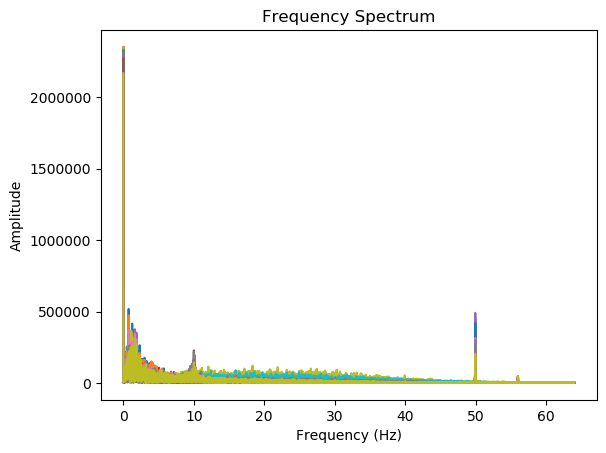

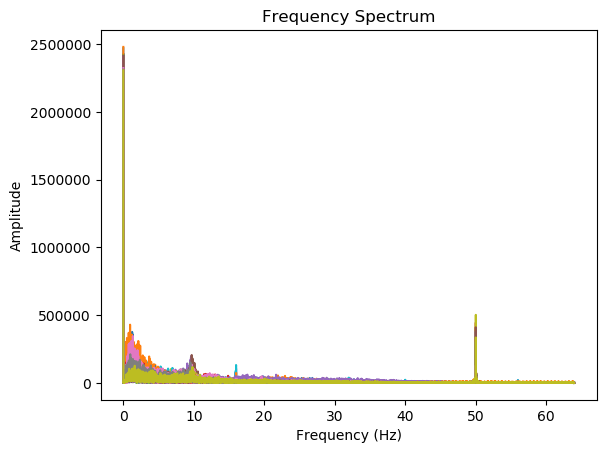

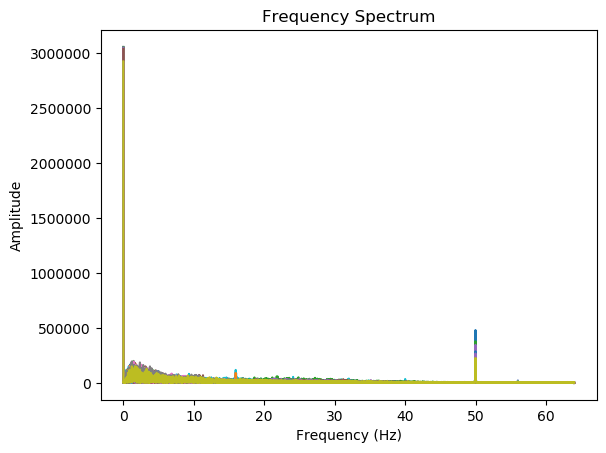

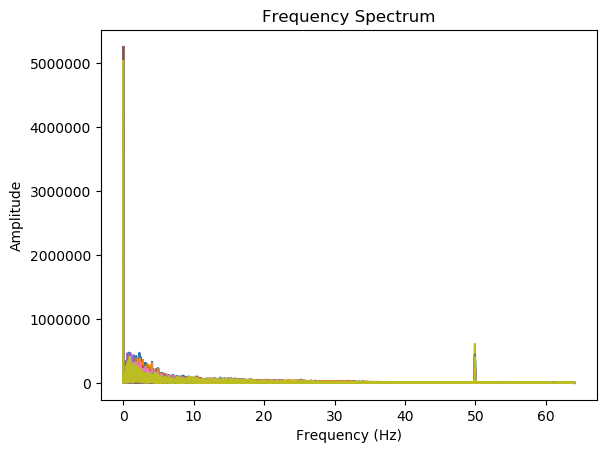

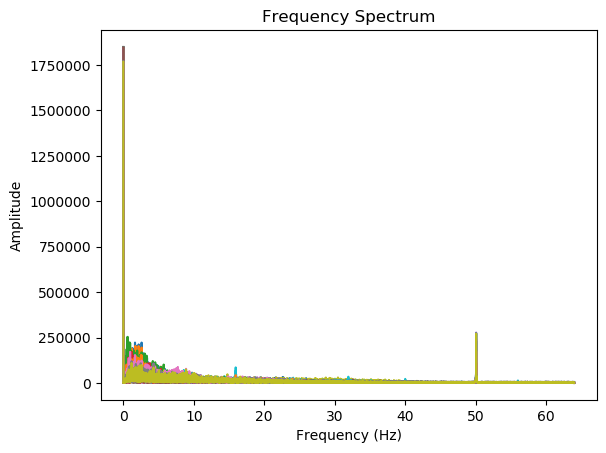

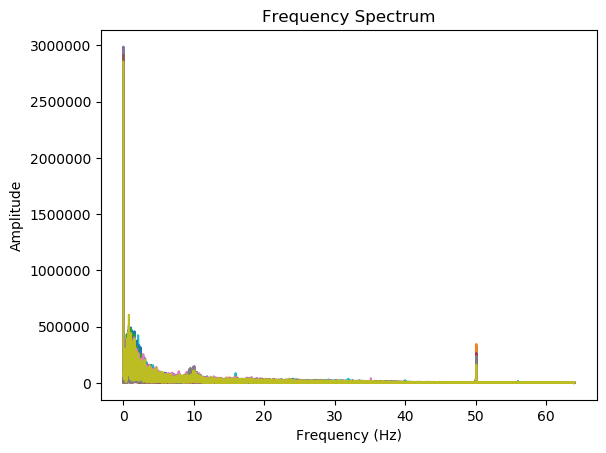

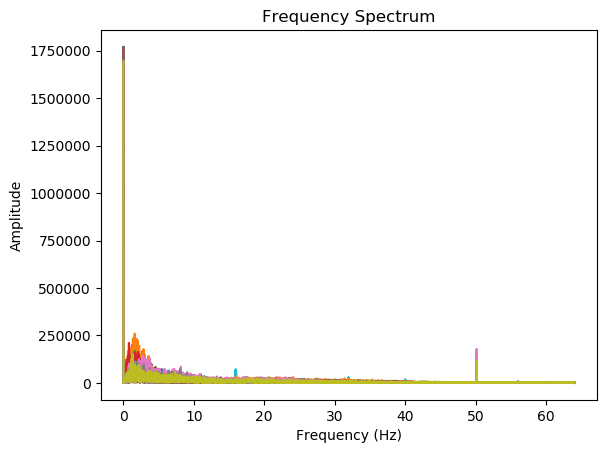

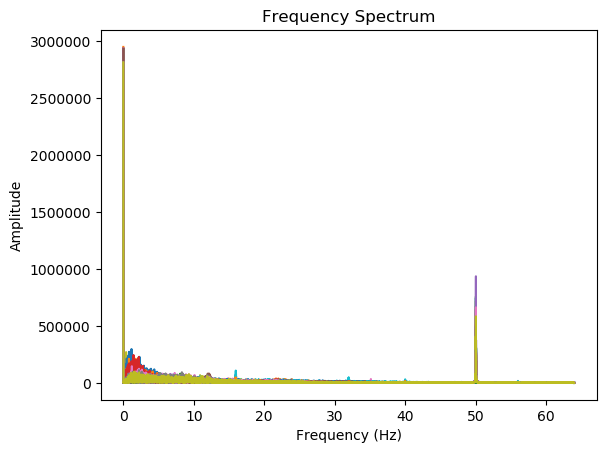

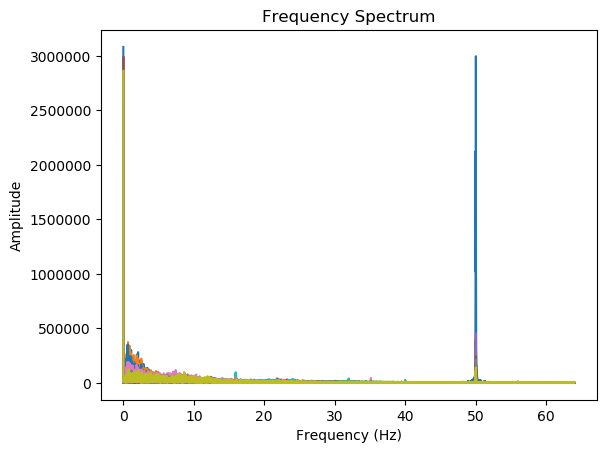

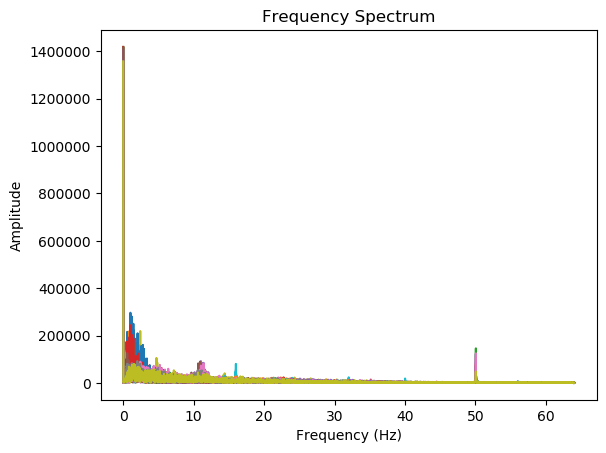

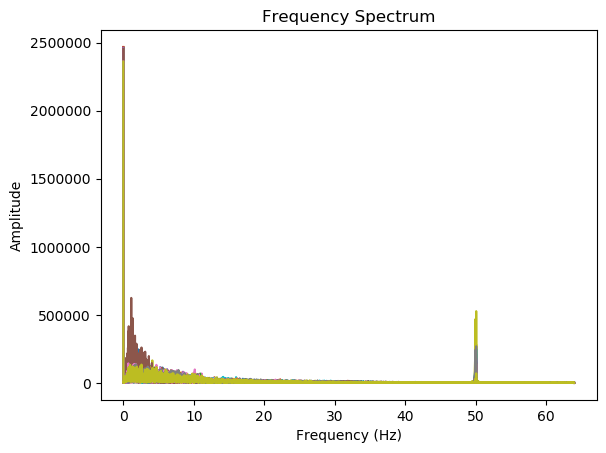

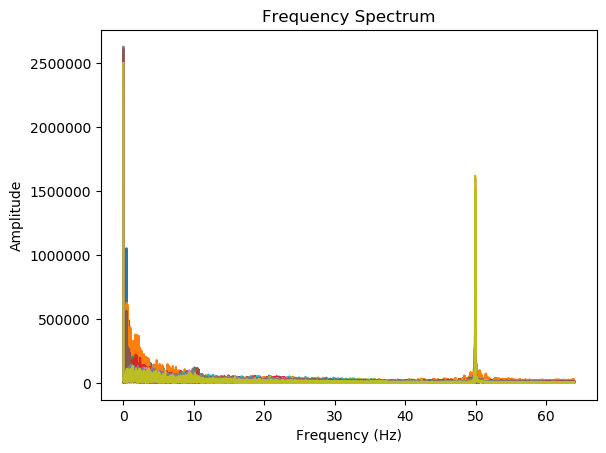

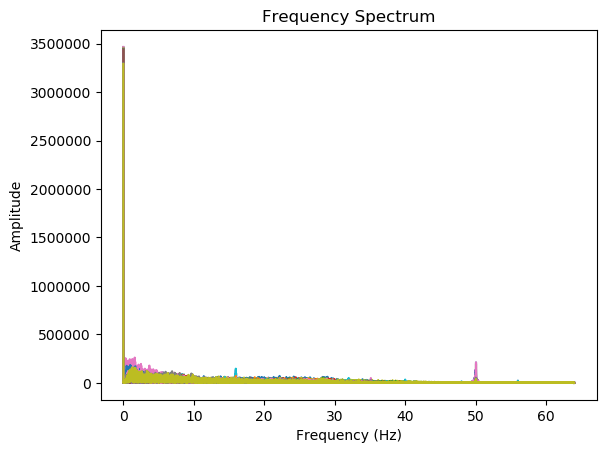

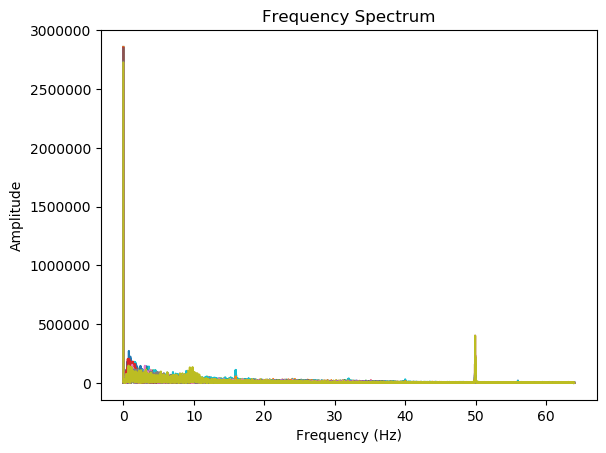

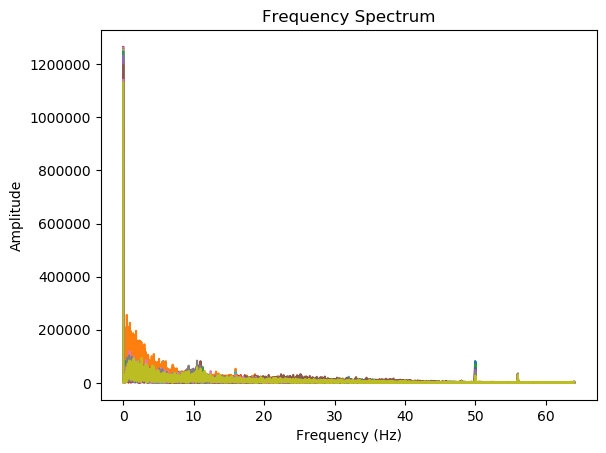

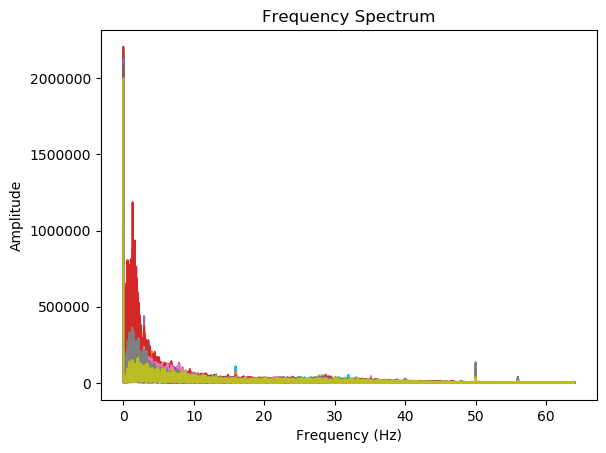

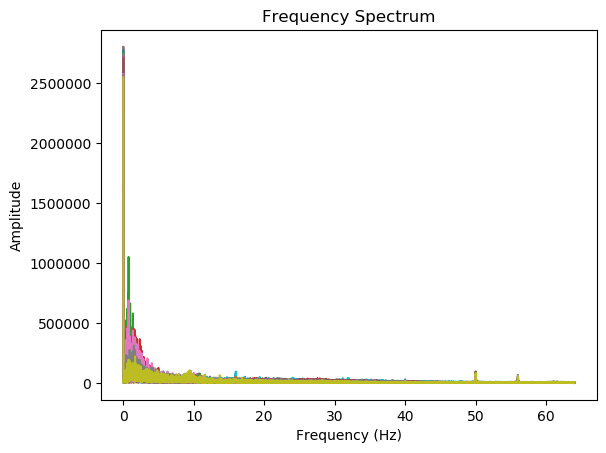

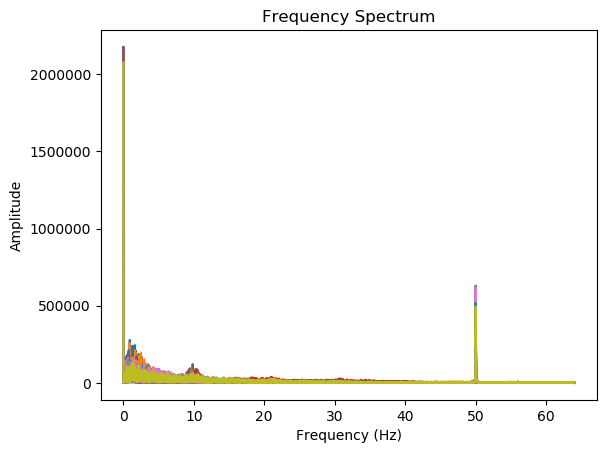

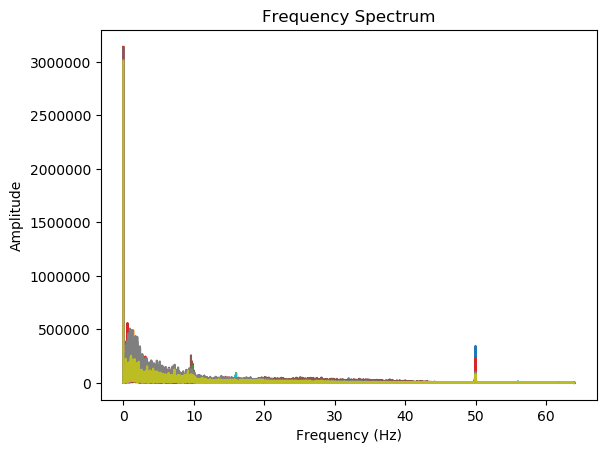

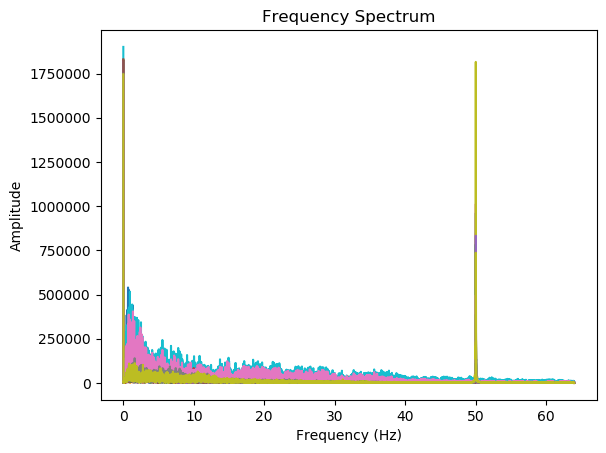

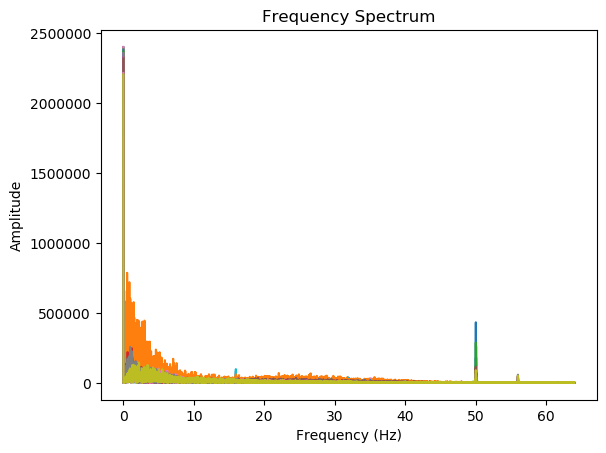

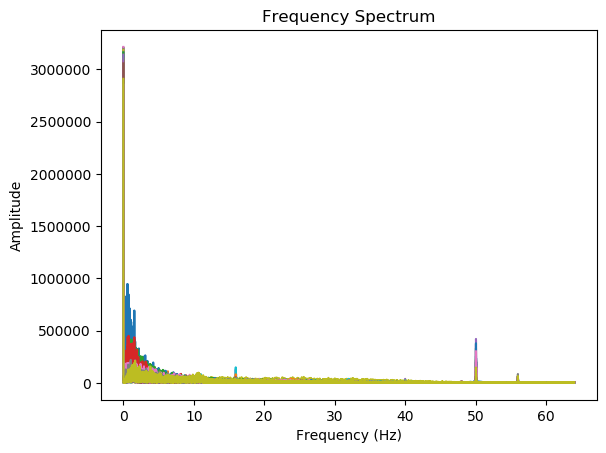

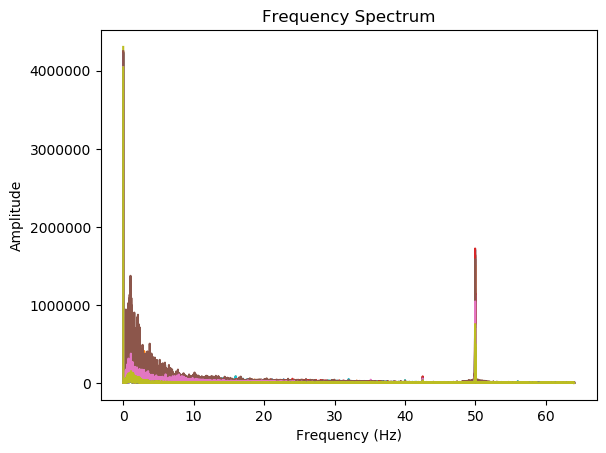

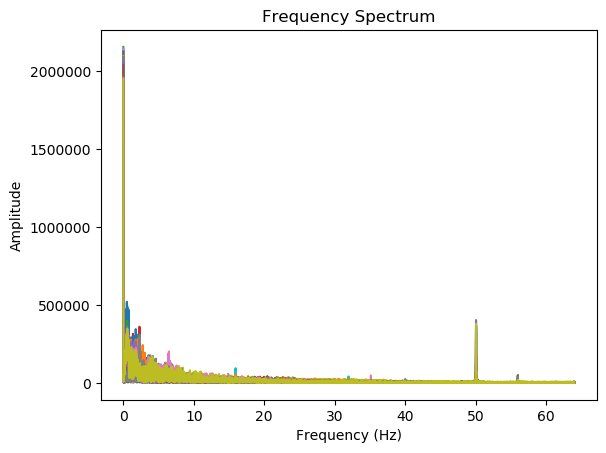

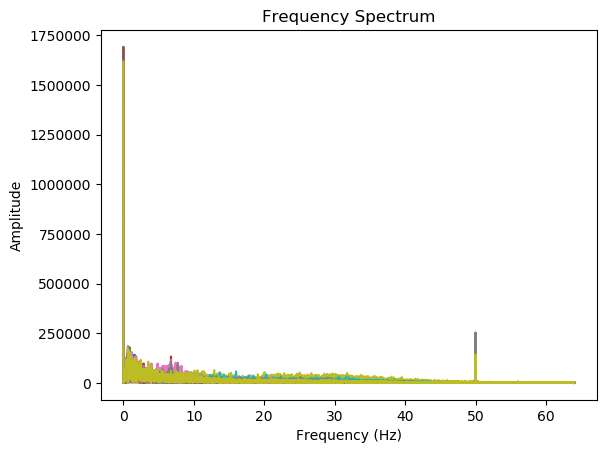

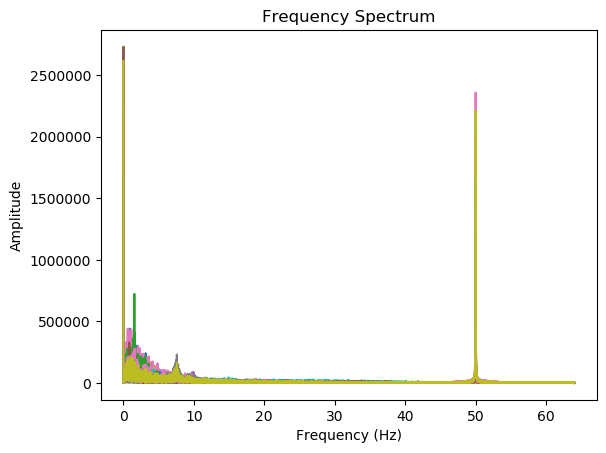

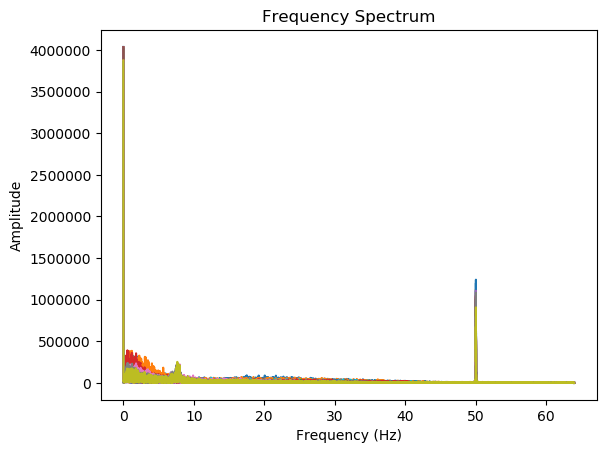

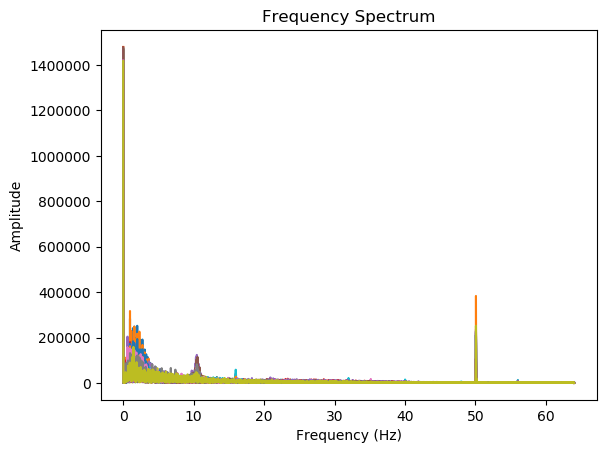

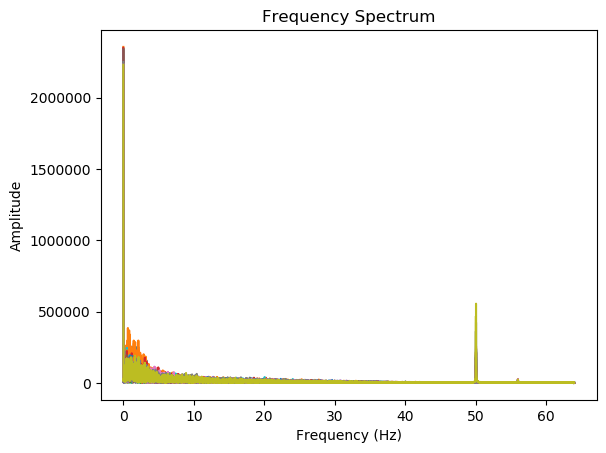

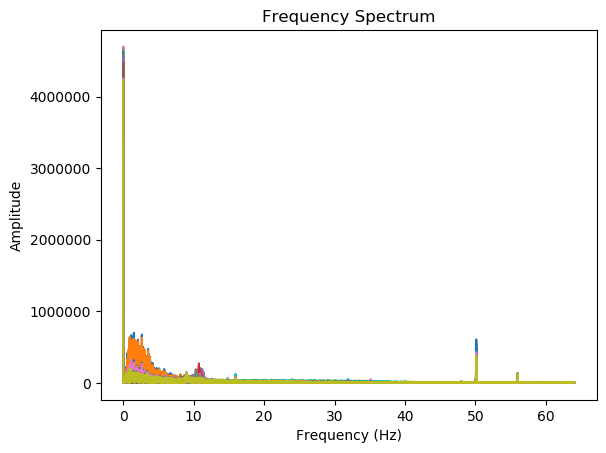

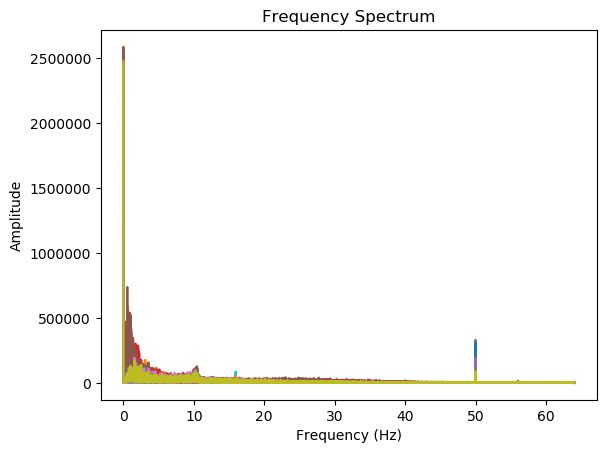

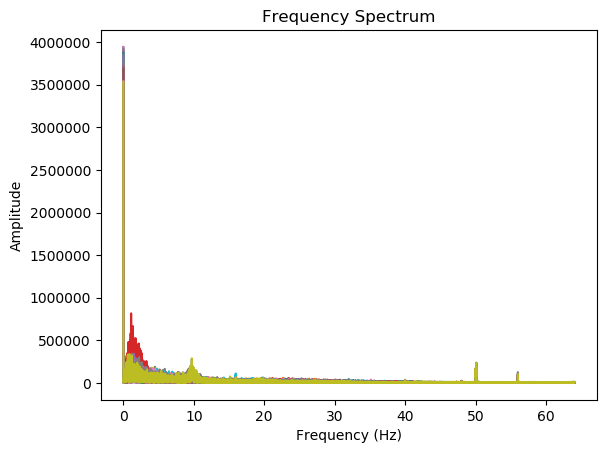

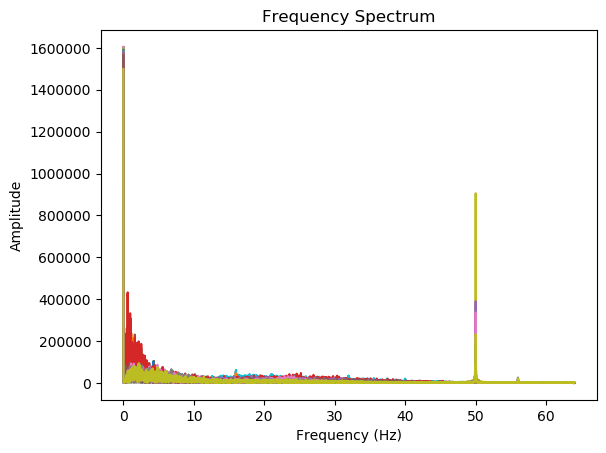

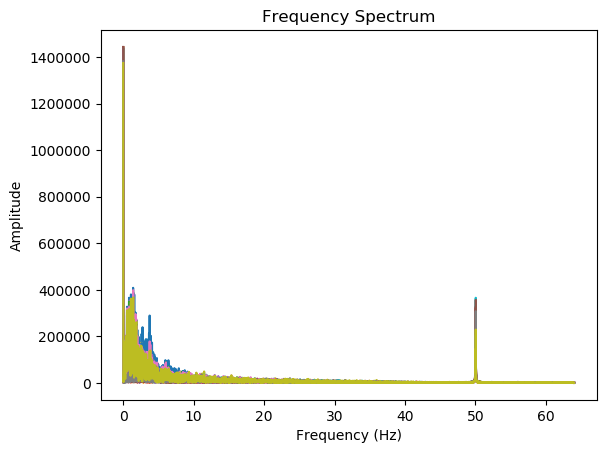

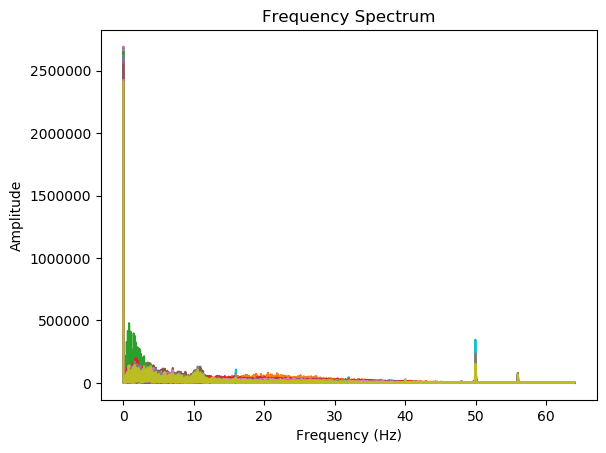

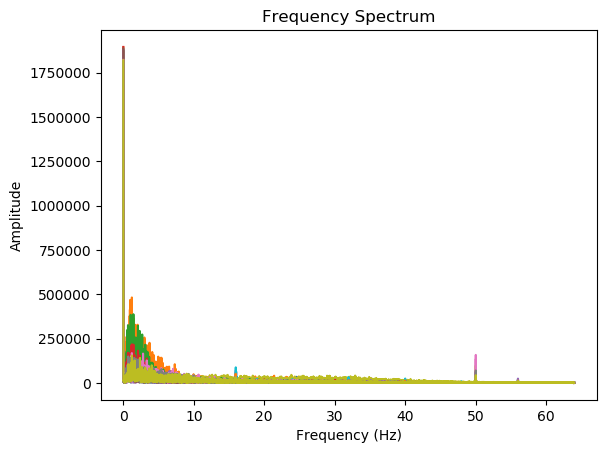

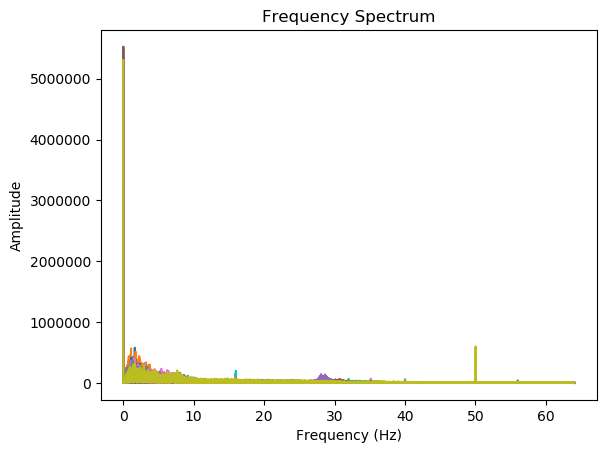

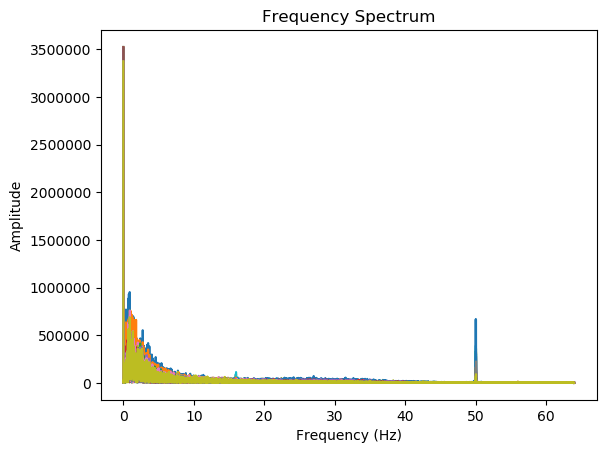

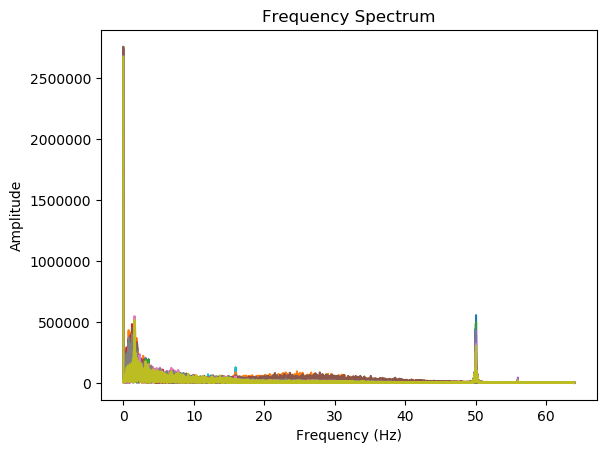

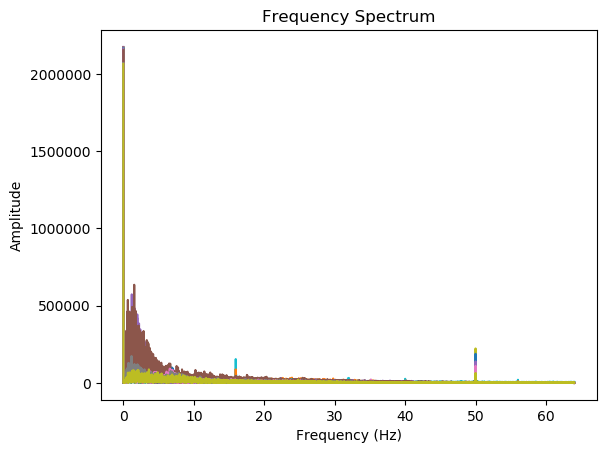

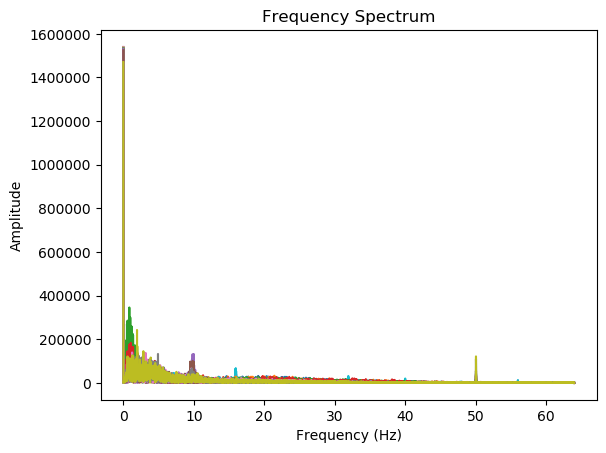

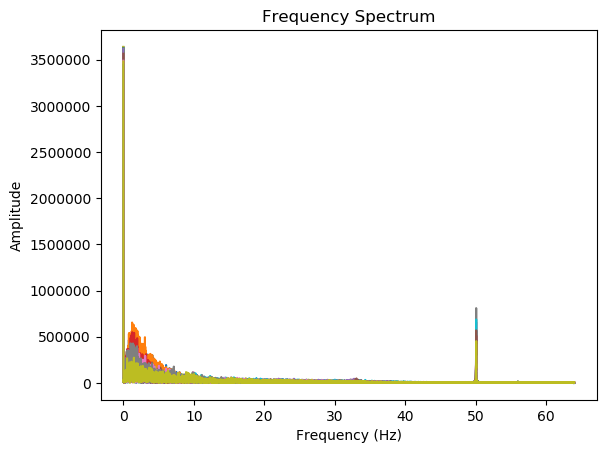

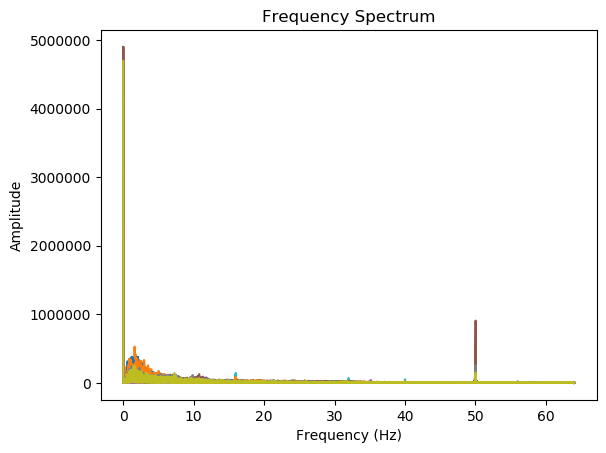

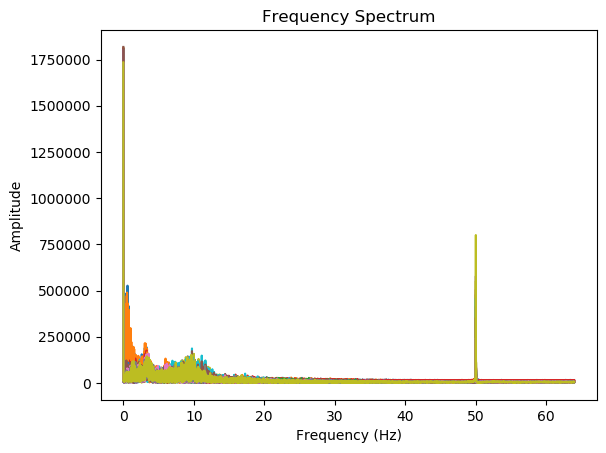

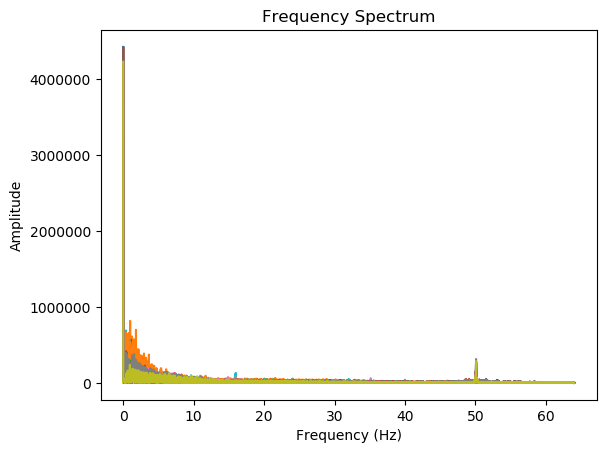

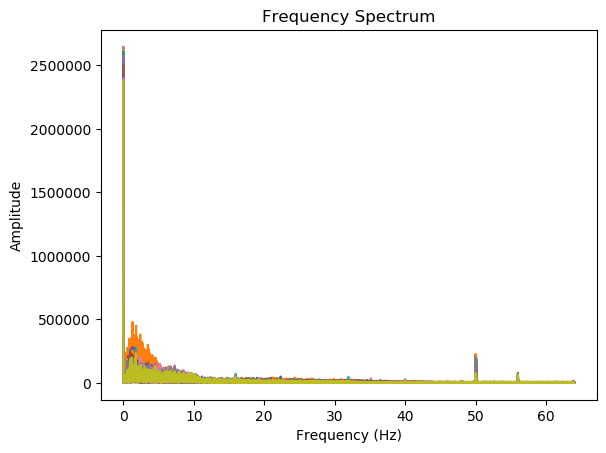

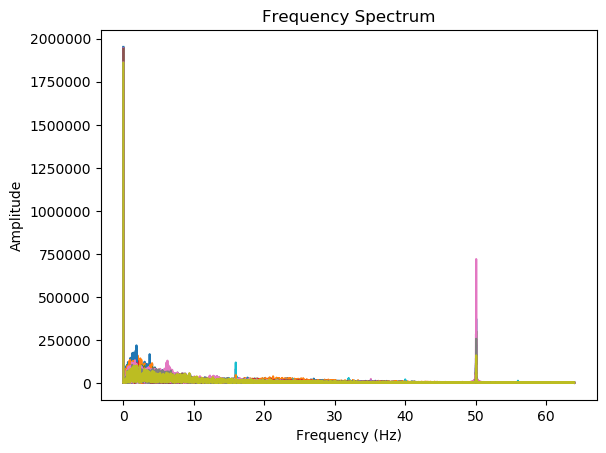

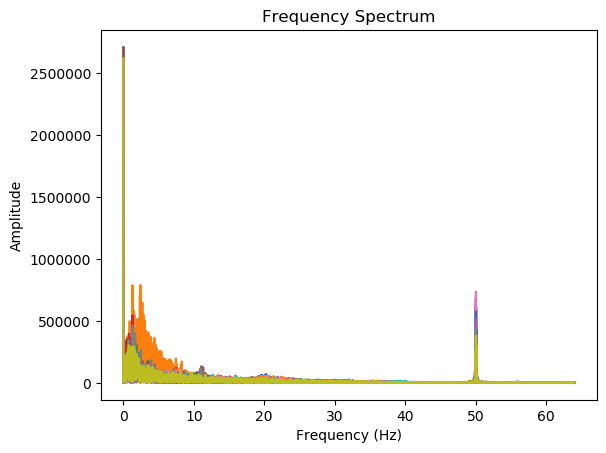

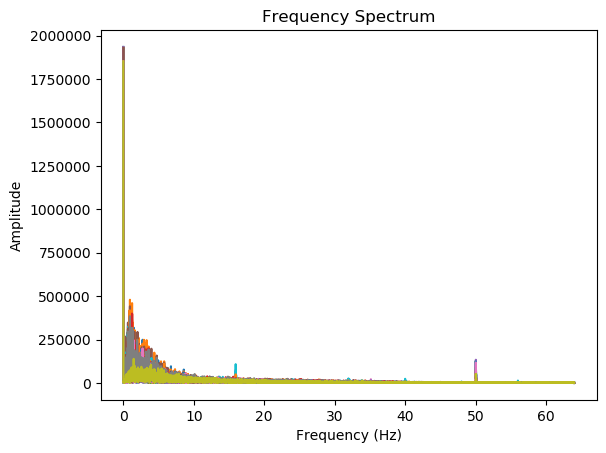

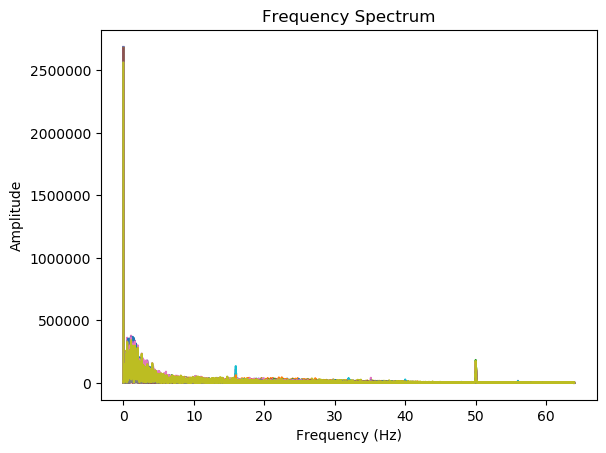

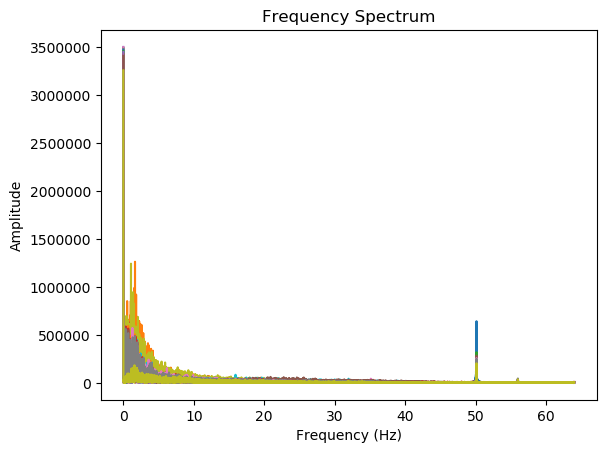

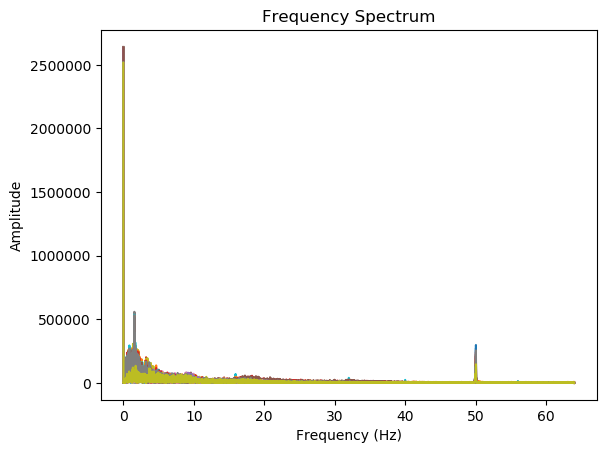

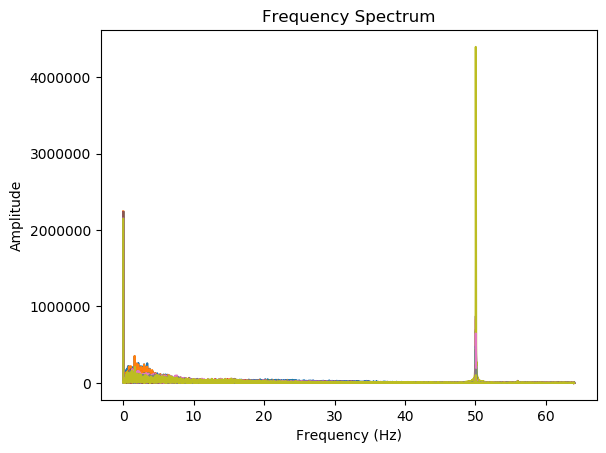

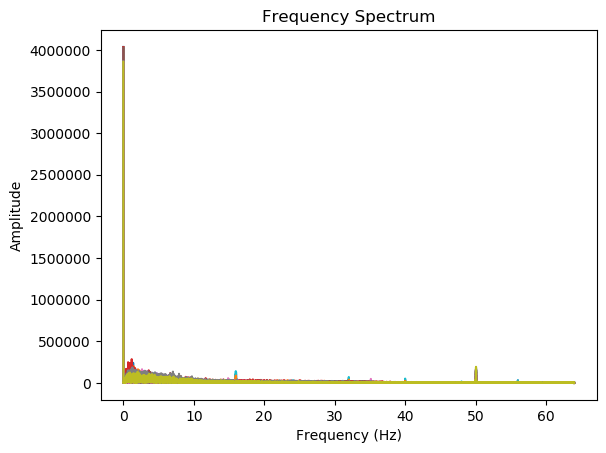

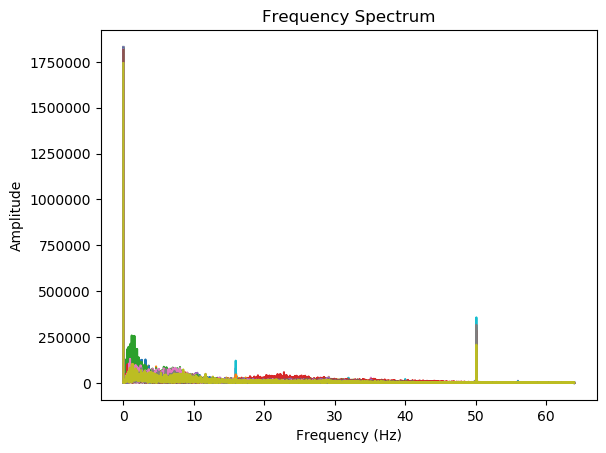

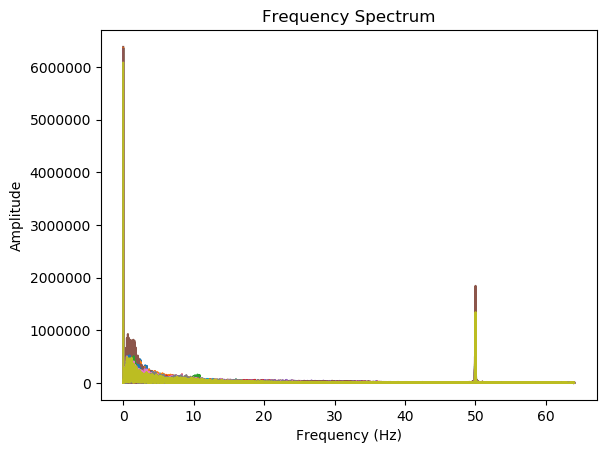

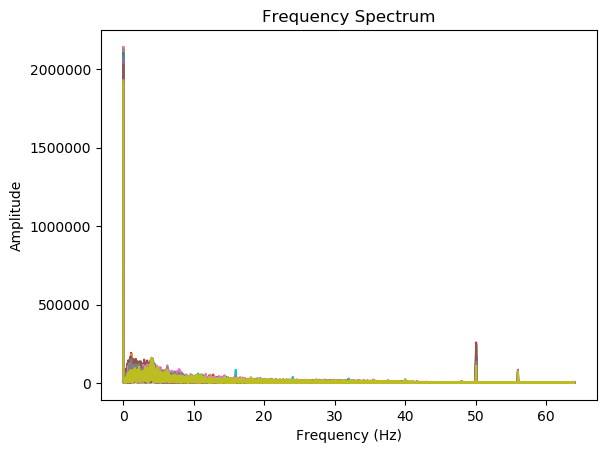

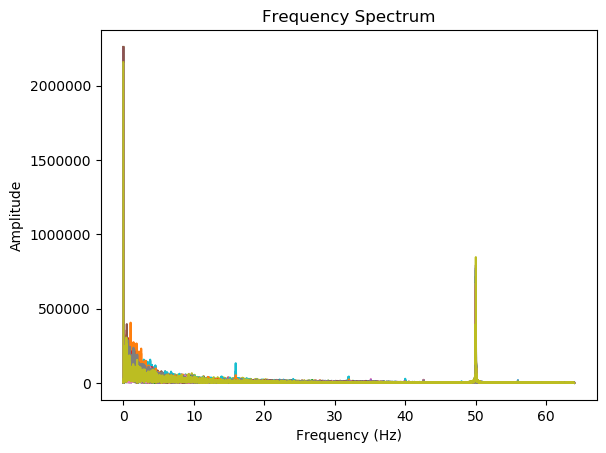

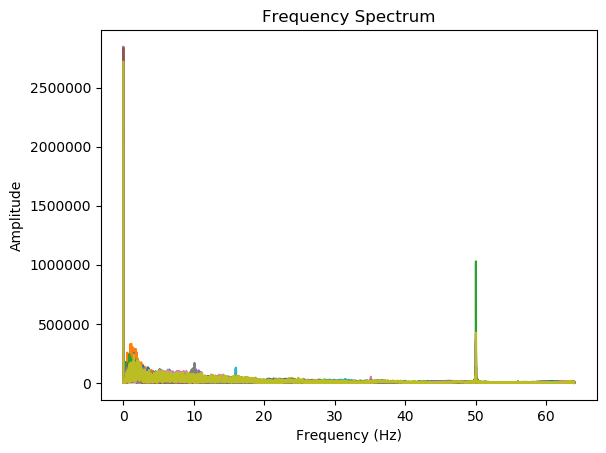

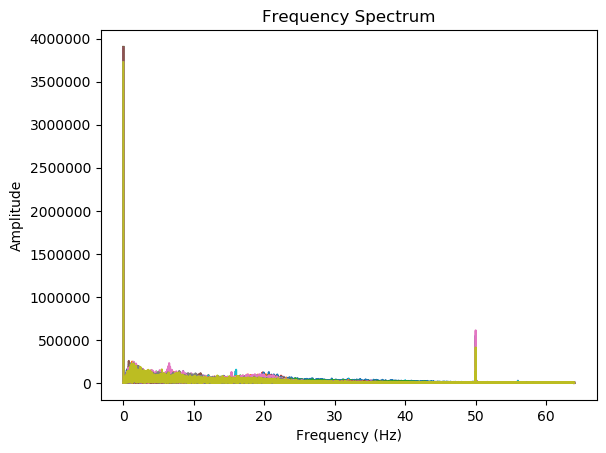

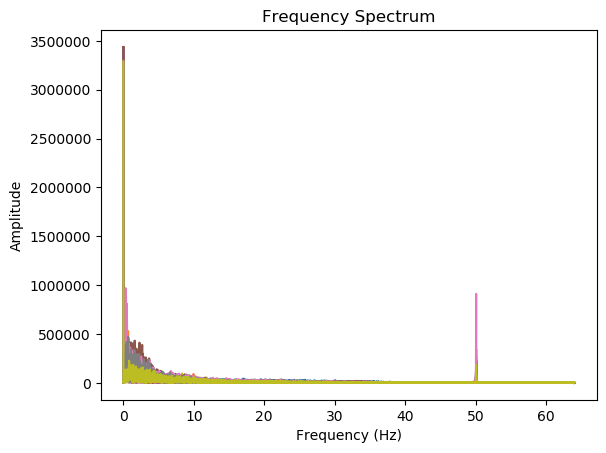

In [55]:
#Visualise PSDs of each donor
for curr in adhd_l:
    dic = pf.mat_load(curr)
    
    import numpy as np
    from scipy.fft import fft

    # Perform FFT
    fft_matrix = np.apply_along_axis(fft, axis=0, arr=dic['data'])

    # Get the magnitude (absolute value) of the FFT
    fft_magnitude = np.abs(fft_matrix)

    # Frequency axis
    n = dic['data'][:,0].shape[0]
    frequency = np.linspace(0.0, fs / 2, n // 2)

    import matplotlib.pyplot as plt

    # Plot the frequency spectrum
    plt.plot(frequency[:n // 2], fft_magnitude[:n // 2])



    # Perform FFT
    fft_matrix = np.apply_along_axis(fft, axis=0, arr=dic['data'])

    # Get the magnitude (absolute value) of the FFT
    fft_magnitude = np.abs(fft_matrix)

    # Frequency axis
    n = dic['data'][:,0].shape[0]
    frequency = np.linspace(0.0, fs / 2, n // 2)

    import matplotlib.pyplot as plt

    # Plot the frequency spectrum
    plt.plot(frequency[:n // 2], fft_magnitude[:n // 2])
    
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.show()

